# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary libraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from urllib.parse import urljoin

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page = requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
movie_urls = []
movie_names = []

# Extract movie URLs and prepend the base URL
base_url = 'https://www.justwatch.com'
movie_links = soup.find_all('a', class_='title-list-grid__item--link')
movie_urls_list = [urljoin(base_url, link['href']) for link in movie_links]

# Create a list of movie names and URLs
for movie_url in movie_urls_list:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
        movie_names.append(movie_name)
        movie_urls.append(movie_url)
    else:
        movie_names.append("Movie name not found")
        movie_urls.append("URL not found")

# Ensure that the lengths match before creating the DataFrame
if len(movie_urls) == len(movie_names):
    # Create a DataFrame from the lists
    data = {
        'Movie Name': movie_names,
        'Movie URL': movie_urls
    }

    # Create a DataFrame from the dictionary
    movies_dataframe = pd.DataFrame(data)

    # Display the DataFrame
    print(movies_dataframe)
else:
    print("Error: Lengths of Movie URLs List and Movie Names List do not match.")


              Movie Name                                          Movie URL
0              12th Fail       https://www.justwatch.com/in/movie/12th-fail
1                 Animal     https://www.justwatch.com/in/movie/animal-2022
2                 Salaar          https://www.justwatch.com/in/movie/salaar
3                Tiger 3         https://www.justwatch.com/in/movie/tiger-3
4               Hi Nanna          https://www.justwatch.com/in/movie/nani30
..                   ...                                                ...
95                Oldboy     https://www.justwatch.com/in/movie/oldboy-2003
96  John Wick: Chapter 4  https://www.justwatch.com/in/movie/john-wick-c...
97         The Abandoned  https://www.justwatch.com/in/movie/the-abandon...
98                  2018       https://www.justwatch.com/in/movie/2018-2023
99               Dunkirk         https://www.justwatch.com/in/movie/dunkirk

[100 rows x 2 columns]


## **Scrapping Movie Title**

In [ ]:
soup = BeautifulSoup(page.text, 'html.parser')

# List to store movie titles
movie_titles = []

# All anchors with class 'title-list-grid__item--link'
movie_anchors = soup.find_all('a', class_='title-list-grid__item--link')

# Extract movie titles from the 'img' tag within each anchor
for movie_anchor in movie_anchors:
    img_tag = movie_anchor.find('img')
    if img_tag:
        movie_title = img_tag['alt']
        movie_titles.append(movie_title)
    else:
        movie_titles.append("Title not found")

# Create a DataFrame with movie titles
titles_dataframe = pd.DataFrame({'Title': movie_titles})

# Display the DataFrame
titles_dataframe


,Title
0,12th Fail
1,Animal
2,Salaar
3,Tiger 3
4,Hi Nanna
...,...
95,Oldboy
96,John Wick: Chapter 4
97,The Abandoned
98,2018


## **Scrapping release Year**

In [ ]:
# All anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
release_years_list = []

# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the span tag with class "text-muted" inside the h1 tag
    release_span = soup_movie.find('span', class_='text-muted')

    # Extract the release year from the release span
    if release_span:
        release_year = release_span.text.strip().replace('(', '').replace(')', '')
    else:
        release_year = "Release year not found"

    # Append data to lists
    movie_names.append(movie_name)
    release_years_list.append(release_year)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Release Year': release_years_list
})

# Display the DataFrame
movies_dataframe


,Movie Name,Release Year
0,12th Fail,2023
1,Animal,2023
2,Salaar,2023
3,Tiger 3,2023
4,Hi Nanna,2023
...,...,...
95,Oldboy,2003
96,John Wick: Chapter 4,2023
97,The Abandoned,2023
98,2018,2023


## **Scrapping Genres**

In [ ]:
# Find all anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
genres_list = []

# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Genres" label
    genres_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Genres')

    # Check if the "Genres" label is found
    if genres_label:
        # Find the corresponding div tag with genres information
        genres_div = genres_label.find_next('div', class_='detail-infos__value')

        # Extract the genres
        if genres_div:
            genres = genres_div.text.strip()
        else:
            genres = "Genres not found"
    else:
        genres = "Genres not found"

    # Append data to lists
    movie_names.append(movie_name)
    genres_list.append(genres)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Genres': genres_list
})

# Display the DataFrame
movies_dataframe


,Movie Name,Genres
0,12th Fail,Drama
1,Animal,"Drama, Action & Adventure, Mystery & Thriller,..."
2,Salaar,"Crime, Drama, Mystery & Thriller, Action & Adv..."
3,Tiger 3,"Action & Adventure, Mystery & Thriller"
4,Hi Nanna,"Drama, Kids & Family, Romance"
...,...,...
95,Oldboy,"Mystery & Thriller, Drama, Action & Adventure"
96,John Wick: Chapter 4,"Crime, Action & Adventure, Mystery & Thriller"
97,The Abandoned,"Mystery & Thriller, Drama, Crime"
98,2018,"Action & Adventure, Mystery & Thriller, Drama"


## **Scrapping IMBD Rating**

In [ ]:
# Lists to store data
movie_names = []
imdb_ratings_list = []

# Iterate through each movie URL and scrape data
for movie_url in movie_urls:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified div and class
    title_block = soup_movie.find('div', class_='title-block')
    if title_block:
        movie_name = title_block.find('h1').text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the div tag containing IMDb rating
    div_tags = soup_movie.find_all('div', class_='jw-scoring-listing__rating')  # Replace with the actual class

    # Extract the IMDb rating
    imdb_rating = None
    for div_tag in div_tags:
        img_tag = div_tag.find('img', alt='IMDB')
        if img_tag:
            imdb_rating_span = div_tag.find('span')
            if imdb_rating_span:
                # Extract only the numeric part of IMDb rating
                imdb_rating = imdb_rating_span.text.strip().split()[0]
                break

    # Append data to lists
    movie_names.append(movie_name)
    imdb_ratings_list.append(imdb_rating)

# Create a DataFrame from the lists
data = {
    'Movie Name': movie_names,
    'IMDb Rating': imdb_ratings_list
}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)

# Display the DataFrame
movies_dataframe


,Movie Name,IMDb Rating
0,12th Fail,9.2
1,Animal,6.7
2,Salaar,6.6
3,Tiger 3,6.4
4,Hi Nanna,8.3
...,...,...
95,Oldboy,8.3
96,John Wick: Chapter 4,7.7
97,The Abandoned,6.3
98,2018,8.4


## **Scrapping Runtime/Duration**

In [ ]:
# Lists to store data
movie_names = []
runtimes_list = []

# Iterate through each movie URL and scrape data
for movie_url in movie_urls:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Runtime" label
    runtime_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Runtime')

    # Check if the "Runtime" label is found
    if runtime_label:
        # Find the corresponding div tag with runtime information
        runtime_div = runtime_label.find_next('div', class_='detail-infos__value')

        # Extract the numeric part of the runtime
        if runtime_div:
            runtime = runtime_div.text.strip().split()[0]
        else:
            runtime = "Runtime information not found"
    else:
        runtime = "Runtime information not found"

    # Append data to lists
    movie_names.append(movie_name)
    runtimes_list.append(runtime)

# Create a DataFrame from the lists
data = {
    'Movie Name': movie_names,
    'Runtime': runtimes_list
}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)

# Display the DataFrame
movies_dataframe


,Movie Name,Runtime
0,12th Fail,2h
1,Animal,3h
2,Salaar,2h
3,Tiger 3,2h
4,Hi Nanna,2h
...,...,...
95,Oldboy,2h
96,John Wick: Chapter 4,2h
97,The Abandoned,1h
98,2018,2h


## **Scrapping Age Rating**

In [ ]:
# Find all anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
age_ratings_list = []

# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Age rating" label
    age_rating_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Age rating')

    # Check if the "Age rating" label is found
    if age_rating_label:
        # Find the corresponding div tag with age rating information
        age_rating_div = age_rating_label.find_next('div', class_='detail-infos__value')

        # Extract the age rating
        if age_rating_div:
            age_rating = age_rating_div.text.strip()
        else:
            age_rating = "Age rating not found"
    else:
        age_rating = "Age rating not found"

    # Append data to lists
    movie_names.append(movie_name)
    age_ratings_list.append(age_rating)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Age Rating': age_ratings_list
})

# Display the DataFrame
movies_dataframe


,Movie Name,Age Rating
0,12th Fail,Age rating not found
1,Animal,A
2,Salaar,A
3,Tiger 3,Age rating not found
4,Hi Nanna,U
...,...,...
95,Oldboy,A
96,John Wick: Chapter 4,Age rating not found
97,The Abandoned,Age rating not found
98,2018,UA


## **Fetching Streaming Service Details**

In [ ]:
# Lists to store movie details
movie_names = []
streaming_availability = []

# Find all anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Extract movie URLs and prepend the base URL
base_url = 'https://www.justwatch.com'
movie_urls = [urljoin(base_url, link['href']) for link in movie_links]

# Iterate through each movie URL and scrape streaming availability
for movie_url in movie_urls:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    movie_name = h1_tag.text.strip() if h1_tag else "Movie name not found"
    movie_names.append(movie_name)

    # Find the streaming availability information
    streaming_section = soup_movie.find('section', {'data-v-3f103c69': True, 'data-v-1d90f11e': True})

    if streaming_section:
        # Extract the streaming availability text
        article_heading = streaming_section.find('article', {'data-v-3f103c69': True}).find('h2', {'data-v-3f103c69': True, 'class': 'heading'})
        streaming_text = article_heading.find_next('p').text.strip() if article_heading else "Streaming information not found"

        # Check if "streaming on" is present in the streaming text
        if "streaming on" in streaming_text:
            # Extract the text after "streaming on"
            platform_start_index = streaming_text.rfind("streaming on") + len("streaming on")
            platform = streaming_text[platform_start_index:].strip()
            streaming_availability.append(platform)
        else:
            streaming_availability.append("Streaming not available")
    else:
        streaming_availability.append("Streaming information not found")

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Streaming Availability': streaming_availability
})

# Display the DataFrame
movies_dataframe


,Movie Name,Streaming Availability
0,12th Fail,Hotstar.
1,Animal,Netflix.
2,Salaar,Netflix.
3,Tiger 3,Amazon Prime Video.
4,Hi Nanna,Netflix.
...,...,...
95,Oldboy,Amazon Prime Video.
96,John Wick: Chapter 4,"Lionsgate Play. It is also possible to buy ""Jo..."
97,The Abandoned,Netflix.
98,2018,Sony Liv.


## **Now Creating Movies DataFrame**

In [ ]:
# Create a dictionary with the data
data = {
    'movie_titles': movie_titles,
    'movie_urls': movie_urls_list,
    'movies_release_years': release_years_list,
    'movies_genres': genres_list,
    'movies_runtimes': runtimes_list,
    'movies_age_ratings': age_ratings_list,
    'movies_imdb_ratings': imdb_ratings_list,
    'movies_streaming_availability': streaming_availability,

}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)

# Display the DataFrame
movies_dataframe.head(5)

,movie_titles,movie_urls,movies_release_years,movies_genres,movies_runtimes,movies_age_ratings,movies_imdb_ratings,movies_streaming_availability
0,12th Fail,https://www.justwatch.com/in/movie/12th-fail,2023,Drama,2h,Age rating not found,9.2,Hotstar.
1,Animal,https://www.justwatch.com/in/movie/animal-2022,2023,"Drama, Action & Adventure, Mystery & Thriller,...",3h,A,6.7,Netflix.
2,Salaar,https://www.justwatch.com/in/movie/salaar,2023,"Crime, Drama, Mystery & Thriller, Action & Adv...",2h,A,6.6,Netflix.
3,Tiger 3,https://www.justwatch.com/in/movie/tiger-3,2023,"Action & Adventure, Mystery & Thriller",2h,Age rating not found,6.4,Amazon Prime Video.
4,Hi Nanna,https://www.justwatch.com/in/movie/nani30,2023,"Drama, Kids & Family, Romance",2h,U,8.3,Netflix.


In [ ]:
movies_dataframe.tail(5)

,movie_titles,movie_urls,release_years,genres,runtimes,age_ratings,imdb_ratings,streaming_availability
95,Oldboy,https://www.justwatch.com/in/movie/oldboy-2003,2003,"Mystery & Thriller, Drama, Action & Adventure",2h,A,8.3,Amazon Prime Video.
96,John Wick: Chapter 4,https://www.justwatch.com/in/movie/john-wick-c...,2023,"Crime, Action & Adventure, Mystery & Thriller",2h,Age rating not found,7.7,"Lionsgate Play. It is also possible to buy ""Jo..."
97,The Abandoned,https://www.justwatch.com/in/movie/the-abandon...,2023,"Mystery & Thriller, Drama, Crime",1h,Age rating not found,6.3,Netflix.
98,2018,https://www.justwatch.com/in/movie/2018-2023,2023,"Action & Adventure, Mystery & Thriller, Drama",2h,UA,8.4,Sony Liv.
99,Dunkirk,https://www.justwatch.com/in/movie/dunkirk,2017,"Drama, History, Mystery & Thriller, War & Mili...",1h,UA,7.8,"Amazon Prime Video, Jio Cinema. It is also pos..."


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup2=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup2.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Sending an HTTP GET request to the URL
page = requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_urls = []
tv_show_names = []

# Extract TV show URLs and prepend the base URL
base_url = 'https://www.justwatch.com'
tv_show_links = soup.find_all('a', class_='title-list-grid__item--link')
tv_show_urls_list = [urljoin(base_url, link['href']) for link in tv_show_links]

# Create a list of TV show names and URLs
for tv_show_url in tv_show_urls_list:
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show name within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_name = h1_tag.text.strip()
        tv_show_names.append(tv_show_name)
        tv_show_urls.append(tv_show_url)
    else:
        tv_show_names.append("TV show name not found")
        tv_show_urls.append("URL not found")

# Ensure that the lengths match before creating the DataFrame
if len(tv_show_urls) == len(tv_show_names):
    # Create a DataFrame from the lists
    data = {
        'TV Show Name': tv_show_names,
        'TV Show URL': tv_show_urls
    }

    # Create a DataFrame from the dictionary
    tv_shows_dataframe = pd.DataFrame(data)

    # Display the DataFrame
    print(tv_shows_dataframe)
else:
    print("Error: Lengths of TV Show URLs List and TV Show Names List do not match.")


            TV Show Name                                        TV Show URL
0              12th Fail       https://www.justwatch.com/in/movie/12th-fail
1                 Animal     https://www.justwatch.com/in/movie/animal-2022
2                 Salaar          https://www.justwatch.com/in/movie/salaar
3                Tiger 3         https://www.justwatch.com/in/movie/tiger-3
4               Hi Nanna          https://www.justwatch.com/in/movie/nani30
..                   ...                                                ...
95                Oldboy     https://www.justwatch.com/in/movie/oldboy-2003
96  John Wick: Chapter 4  https://www.justwatch.com/in/movie/john-wick-c...
97         The Abandoned  https://www.justwatch.com/in/movie/the-abandon...
98                  2018       https://www.justwatch.com/in/movie/2018-2023
99               Dunkirk         https://www.justwatch.com/in/movie/dunkirk

[100 rows x 2 columns]


## **Fetching Tv Show Title details**

In [ ]:
soup2 = BeautifulSoup(page.text, 'html.parser')

# List to store TV show titles
tv_show_titles = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')

# Extract TV show titles from the href attribute
for tv_show_link in tv_show_links:
    href = tv_show_link.get('href')
    if href:
        tv_show_name = href.split('/')[-1]  # Extract the last segment as the TV show name
        tv_show_titles.append(tv_show_name)
    else:
        tv_show_titles.append("Title not found")

# Create a DataFrame with TV show titles
tv_shows_dataframe = pd.DataFrame({'TV Show Title': tv_show_titles})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title
0,jack-reacher
1,berlin
2,game-of-thrones
3,mirzapur
4,true-detective
...,...
95,the-witcher
96,the-unwanted-undead-adventurer
97,a-murder-at-the-end-of-the-world
98,person-of-interest


## **Fetching Release Year**

In [ ]:
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
release_years_list2 = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_title = h1_tag.text.strip()
        tv_show_titles.append(tv_show_title)
    else:
        tv_show_titles.append("TV show title not found")

    # Find the span tag with class "text-muted" inside the h1 tag
    release_span = soup_tv_show.find('span', class_='text-muted')

    # Extract the release year from the release span
    if release_span:
        release_year = release_span.text.strip().replace('(', '').replace(')', '')
        release_years_list2.append(release_year)
    else:
        release_years_list2.append("Release year not found")

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Release Year': release_years_list2
})

# Display the DataFrame
tv_shows_dataframe


,TV Show Title,Release Year
0,Reacher,2022
1,Berlin,2023
2,Game of Thrones,2011
3,Mirzapur,2018
4,True Detective,2014
...,...,...
95,The Witcher,2019
96,The Unwanted Undead Adventurer,2024
97,A Murder at the End of the World,2023
98,Person of Interest,2011


## **Fetching TV Show Genre Details**

In [ ]:
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
genres_list2 = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_title = h1_tag.text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the "Genres" label
    genres_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Genres')

    # Check if the "Genres" label is found
    if genres_label:
        # Find the corresponding div tag with genres information
        genres_div = genres_label.find_next('div', class_='detail-infos__value')

        # Extract the genres
        if genres_div:
            tv_show_genres = genres_div.text.strip()
        else:
            tv_show_genres = "Genres not found"
    else:
        tv_show_genres = "Genres not found"

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    genres_list2.append(tv_show_genres)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Genres': genres_list2
})

# Display the DataFrame
tv_shows_dataframe


,TV Show Title,Genres
0,Reacher,"Crime, Drama, Mystery & Thriller, Action & Adv..."
1,Berlin,"Drama, Action & Adventure, Crime, Mystery & Th..."
2,Game of Thrones,"Drama, Action & Adventure, Science-Fiction, Fa..."
3,Mirzapur,"Crime, Action & Adventure, Drama, Mystery & Th..."
4,True Detective,"Drama, Crime, Mystery & Thriller"
...,...,...
95,The Witcher,"Drama, Action & Adventure, Science-Fiction, Fa..."
96,The Unwanted Undead Adventurer,"Science-Fiction, Action & Adventure"
97,A Murder at the End of the World,"Drama, Mystery & Thriller, Crime"
98,Person of Interest,"Science-Fiction, Drama, Action & Adventure, Cr..."


## **Fetching IMDB Rating Details**

In [ ]:
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
imdb_ratings_list2 = []

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the div tag containing IMDb rating
    div_tags = soup_tv_show.find_all('div', class_='jw-scoring-listing__rating')  # Replace with the actual class

    # Extract the IMDb rating
    imdb_rating = None
    for div_tag in div_tags:
        img_tag = div_tag.find('img', alt='IMDB')
        if img_tag:
            imdb_rating_span = div_tag.find('span')
            if imdb_rating_span:
                # Extract only the numeric part of IMDb rating
                imdb_rating = imdb_rating_span.text.strip().split()[0]
                break

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    imdb_ratings_list2.append(imdb_rating)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'IMDb Rating': imdb_ratings_list2
})

# Display the DataFrame
tv_shows_dataframe


,TV Show Title,IMDb Rating
0,Reacher,8.1
1,Berlin,7.0
2,Game of Thrones,9.2
3,Mirzapur,8.5
4,True Detective,8.9
...,...,...
95,The Witcher,8.0
96,The Unwanted Undead Adventurer,None
97,A Murder at the End of the World,7.1
98,Person of Interest,8.5


## **Fetching Age Rating Details**

In [ ]:
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
age_ratings_list2 = []

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the "Age rating" label
    age_rating_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Age rating')

    # Check if the "Age rating" label is found
    if age_rating_label:
        # Find the corresponding div tag with age rating information
        age_rating_div = age_rating_label.find_next('div', class_='detail-infos__value')

        # Extract the age rating
        if age_rating_div:
            age_rating = age_rating_div.text.strip()
        else:
            age_rating = "Age rating not found"
    else:
        age_rating = "Age rating not found"

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    age_ratings_list2.append(age_rating)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Age Rating': age_ratings_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,Age Rating
0,Reacher,A
1,Berlin,Age rating not found
2,Game of Thrones,U
3,Mirzapur,Age rating not found
4,True Detective,U
...,...,...
95,The Witcher,A
96,The Unwanted Undead Adventurer,Age rating not found
97,A Murder at the End of the World,Age rating not found
98,Person of Interest,U


## **Fetching Streaming Service details**

In [ ]:
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
streaming_availability_list2 = []

# Iterate through each TV show URL and scrape streaming availability
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"
    tv_show_titles.append(tv_show_title)

    # Find the streaming availability information
    streaming_section = soup_tv_show.find('section', {'data-v-3f103c69': True, 'data-v-1d90f11e': True})

    if streaming_section:
        # Extract the streaming availability text
        article_heading = streaming_section.find('article', {'data-v-3f103c69': True}).find('h2', {'data-v-3f103c69': True, 'class': 'heading'})
        streaming_text = article_heading.find_next('p').text.strip() if article_heading else "Streaming information not found"

        # Check if "streaming on" is present in the streaming text
        if "streaming on" in streaming_text:
            # Extract the text after "streaming on"
            platform_start_index = streaming_text.rfind("streaming on") + len("streaming on")
            platform = streaming_text[platform_start_index:].strip()
            streaming_availability_list2.append(platform)
        else:
            streaming_availability_list2.append("Streaming not available")
    else:
        streaming_availability_list2.append("Streaming information not found")

# Create a DataFrame from the lists
tv_shows_dataframe= pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Streaming Availability': streaming_availability_list2
})

# Display the DataFrame
tv_shows_dataframe


,TV Show Title,Streaming Availability
0,Reacher,Amazon Prime Video.
1,Berlin,Netflix.
2,Game of Thrones,Jio Cinema.
3,Mirzapur,Amazon Prime Video.
4,True Detective,Jio Cinema.
...,...,...
95,The Witcher,Netflix.
96,The Unwanted Undead Adventurer,"Netflix, Crunchyroll or for free with ads on C..."
97,A Murder at the End of the World,Hotstar.
98,Person of Interest,Streaming not available


## **Fetching Duration Details**

In [ ]:
# Your BeautifulSoup object for TV shows (replace this with your actual soup object)
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
runtimes_list2 = []

# Iterate through each TV show URL and scrape runtime
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"
    tv_show_titles.append(tv_show_title)

    # Find the "Runtime" label
    runtime_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Runtime')

    # Check if the "Runtime" label is found
    if runtime_label:
        # Find the corresponding div tag with runtime information
        runtime_div = runtime_label.find_next('div', class_='detail-infos__value')

        # Extract the numeric part of the runtime
        if runtime_div:
            runtime = runtime_div.text.strip().split()[0]
        else:
            runtime = "Runtime information not found"
    else:
        runtime = "Runtime information not found"

    # Append data to lists
    runtimes_list2.append(runtime)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Runtime': runtimes_list2
})

# Display the DataFrame
tv_shows_dataframe


,TV Show Title,Runtime
0,Reacher,48min
1,Berlin,48min
2,Game of Thrones,58min
3,Mirzapur,36min
4,True Detective,1h
...,...,...
95,The Witcher,57min
96,The Unwanted Undead Adventurer,24min
97,A Murder at the End of the World,1h
98,Person of Interest,44min


## **Creating TV Show DataFrame**

In [ ]:
# Create a dictionary with the TV shows data
tv_shows_data = {
    'tv_show_titles': tv_show_titles,
    'tv_show_urls': tv_show_urls,
    'tv_shows_runtimes': runtimes_list2,
    'tv_shows_age_ratings': age_ratings_list2,
    'tv_shows_imdb_ratings': imdb_ratings_list2,
    'tv_shows_genres': genres_list2,
    'tv_shows_release_years': release_years_list2,
    'tv_shows_streaming_availability': streaming_availability_list2,
}

# Create a DataFrame from the dictionary
tv_shows_dataframe = pd.DataFrame(tv_shows_data)

# Display the DataFrame
tv_shows_dataframe.head(5)



,tv_show_titles,tv_show_urls,tv_shows_runtimes,tv_shows_age_ratings,tv_shows_imdb_ratings,tv_shows_genres,tv_shows_release_years,tv_shows_streaming_availability
0,Reacher,https://www.justwatch.com/in/movie/12th-fail,48min,A,8.1,"Crime, Drama, Mystery & Thriller, Action & Adv...",2022,Amazon Prime Video.
1,Berlin,https://www.justwatch.com/in/movie/animal-2022,48min,Age rating not found,7.0,"Drama, Action & Adventure, Crime, Mystery & Th...",2023,Netflix.
2,Game of Thrones,https://www.justwatch.com/in/movie/salaar,58min,U,9.2,"Drama, Action & Adventure, Science-Fiction, Fa...",2011,Jio Cinema.
3,Mirzapur,https://www.justwatch.com/in/movie/tiger-3,36min,Age rating not found,8.5,"Crime, Action & Adventure, Drama, Mystery & Th...",2018,Amazon Prime Video.
4,True Detective,https://www.justwatch.com/in/movie/nani30,1h,U,8.9,"Drama, Crime, Mystery & Thriller",2014,Jio Cinema.


In [ ]:
tv_shows_dataframe.tail(5)

,tv_show_titles,tv_show_urls,runtimes,age_ratings,imdb_ratings,genres,release_years,streaming_availability
95,The Witcher,https://www.justwatch.com/in/movie/oldboy-2003,57min,A,8.0,"Drama, Action & Adventure, Science-Fiction, Fa...",2019,Netflix.
96,The Unwanted Undead Adventurer,https://www.justwatch.com/in/movie/john-wick-c...,24min,Age rating not found,None,"Science-Fiction, Action & Adventure",2024,"Netflix, Crunchyroll or for free with ads on C..."
97,A Murder at the End of the World,https://www.justwatch.com/in/movie/the-abandon...,1h,Age rating not found,7.1,"Drama, Mystery & Thriller, Crime",2023,Hotstar.
98,Person of Interest,https://www.justwatch.com/in/movie/2018-2023,44min,U,8.5,"Science-Fiction, Drama, Action & Adventure, Cr...",2011,Streaming not available
99,Obliterated,https://www.justwatch.com/in/movie/dunkirk,51min,A,6.7,"Comedy, Action & Adventure, Drama",2023,Netflix.


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
from datetime import datetime

# Get the current date
current_date = datetime.now()

# Extract the year from the current date
current_year = current_date.year

print("Current Date:", current_date)
print("Current Year:", current_year)


Current Date: 2024-01-26 06:25:23.042784
Current Year: 2024


In [ ]:
#function to filter only the movies and tv shows released in last 2 years from current date

from datetime import datetime
import pandas as pd

# Get the current year
current_year = datetime.now().year

# Convert 'movies_release_years' column to numeric
movies_dataframe['movies_release_years'] = pd.to_numeric(movies_dataframe['movies_release_years'], errors='coerce')
tv_shows_dataframe['tv_shows_release_years'] = pd.to_numeric(tv_shows_dataframe['tv_shows_release_years'], errors='coerce')

# Function to filter movies based on release year and arrange in descending order
def filter_and_sort_movies(movies_dataframe, current_year):
    filtered_movies = movies_dataframe[movies_dataframe['movies_release_years'].between(current_year - 2, current_year)]
    sorted_and_filterd_movies = filtered_movies.sort_values(by='movies_release_years', ascending=False)
    return sorted_and_filterd_movies

# Function to filter TV shows based on release year and arrange in descending order
def filter_and_sort_tv_shows(tv_shows_dataframe, current_year):
    filtered_tv_shows = tv_shows_dataframe[tv_shows_dataframe['tv_shows_release_years'].between(current_year - 2, current_year)]
    sorted_and_filterd_tv_shows = filtered_tv_shows.sort_values(by='tv_shows_release_years', ascending=False)
    return sorted_and_filterd_tv_shows

# Filter and sort movies and TV shows
sorted_and_filterd_movies = filter_and_sort_movies(movies_dataframe, current_year)
sorted_and_filterd_tv_shows = filter_and_sort_tv_shows(tv_shows_dataframe, current_year)


# Display the filtered DataFrames
print("Filtered Movies:")
sorted_and_filterd_movies.head(2)


Filtered Movies:


,movie_titles,movie_urls,movies_release_years,movies_genres,movies_runtimes,movies_age_ratings,movies_imdb_ratings,movies_streaming_availability
54,Guntur Kaaram,https://www.justwatch.com/in/movie/ssmb-28,2024,"Action & Adventure, Drama, Kids & Family",2h,UA,6.4,Streaming not available
30,Lift,https://www.justwatch.com/in/movie/lift-0,2024,"Comedy, Crime, Drama, Mystery & Thriller, Acti...",1h,Age rating not found,5.5,Netflix.


In [ ]:
sorted_and_filterd_movies.tail(2)

,movie_titles,movie_urls,movies_release_years,movies_genres,movies_runtimes,movies_age_ratings,movies_imdb_ratings,movies_streaming_availability
65,K.G.F: Chapter 2,https://www.justwatch.com/in/movie/k-g-f-chapt...,2022,"Action & Adventure, Crime, Drama, Mystery & Th...",2h,UA,8.3,Amazon Prime Video or rent it on Amazon Video ...
66,The Batman,https://www.justwatch.com/in/movie/the-batman,2022,"Crime, Mystery & Thriller, Action & Adventure,...",2h,UA,7.8,"Netflix. It is also possible to buy ""The Batma..."


In [ ]:
print("\nFiltered TV Shows:")
sorted_and_filterd_tv_shows.head(2)


Filtered TV Shows:


,tv_show_titles,tv_show_urls,tv_shows_runtimes,tv_shows_age_ratings,tv_shows_imdb_ratings,tv_shows_genres,tv_shows_release_years,tv_shows_streaming_availability
46,The Brothers Sun,https://www.justwatch.com/in/movie/curry-and-c...,55min,Age rating not found,7.7,"Comedy, Drama, Action & Adventure, Crime",2024,Netflix.
15,Killer Soup,https://www.justwatch.com/in/movie/devil-2023,49min,Age rating not found,6.3,"Drama, Mystery & Thriller, Comedy",2024,Netflix.


In [ ]:
print("\nFiltered TV Shows:")
sorted_and_filterd_tv_shows.tail(2)


Filtered TV Shows:


,tv_show_titles,tv_show_urls,tv_shows_runtimes,tv_shows_age_ratings,tv_shows_imdb_ratings,tv_shows_genres,tv_shows_release_years,tv_shows_streaming_availability
60,House of the Dragon,https://www.justwatch.com/in/movie/merry-chris...,1h,A,8.5,"Drama, Action & Adventure, Science-Fiction, Fa...",2022,Jio Cinema.
0,Reacher,https://www.justwatch.com/in/movie/12th-fail,48min,A,8.1,"Crime, Drama, Mystery & Thriller, Action & Adv...",2022,Amazon Prime Video.


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Calculate the mean IMDb rating for movies
mean_imdb_rating_movies = movies_dataframe['movies_imdb_ratings'].astype(float).mean()

# Calculate the mean IMDb rating for TV shows
mean_imdb_rating_tv_shows = tv_shows_dataframe['tv_shows_imdb_ratings'].astype(float).mean()

print(f"Mean IMDb Rating for Movies: {mean_imdb_rating_movies:.2f}")
print(f"Mean IMDb Rating for TV Shows: {mean_imdb_rating_tv_shows:.2f}")

Mean IMDb Rating for Movies: 7.23
Mean IMDb Rating for TV Shows: 7.90


## **Analyzing Top Genres**

In [ ]:
# Analyze top genres for movies
top_genres_movies = movies_dataframe['movies_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

# Analyze top genres for TV shows
top_genres_tv_shows = tv_shows_dataframe['tv_shows_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

top_genres_movies_data = {
    'Genre': top_genres_movies.index,
    'Count': top_genres_movies.values
}

top_genres_tv_shows_data = {
    'Genre': top_genres_tv_shows.index,
    'Count': top_genres_tv_shows.values
}

# Create DataFrames
top_genres_movies_df = pd.DataFrame(top_genres_movies_data)
top_genres_tv_shows_df = pd.DataFrame(top_genres_tv_shows_data)

# Display DataFrames
print("Top Genres for Movies:")
top_genres_movies_df



Top Genres for Movies:


,Genre,Count
0,Drama,71
1,Action & Adventure,51
2,Mystery & Thriller,47
3,Comedy,27
4,Crime,25


In [ ]:
print("\nTop Genres for TV Shows:")
top_genres_tv_shows_df


Top Genres for TV Shows:


,Genre,Count
0,Drama,86
1,Mystery & Thriller,42
2,Action & Adventure,37
3,Crime,35
4,Comedy,32


In [ ]:
pip install wordcloud


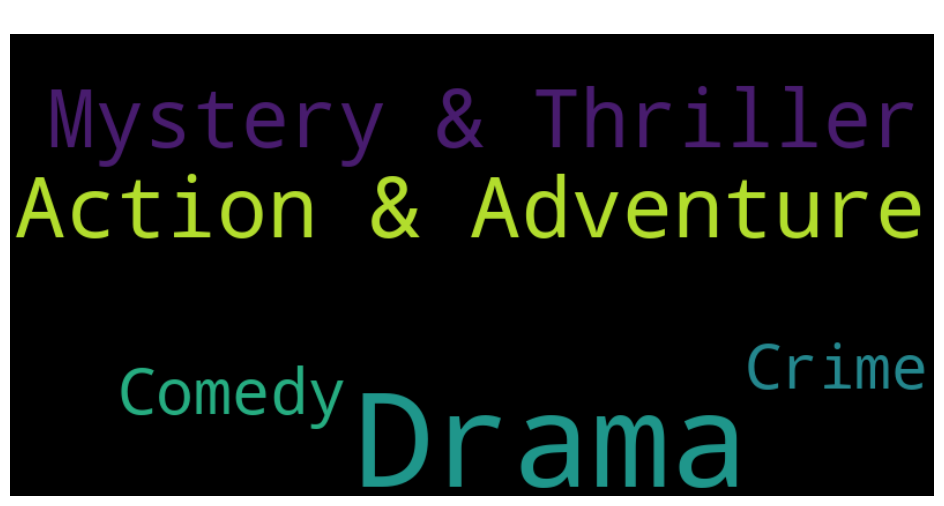

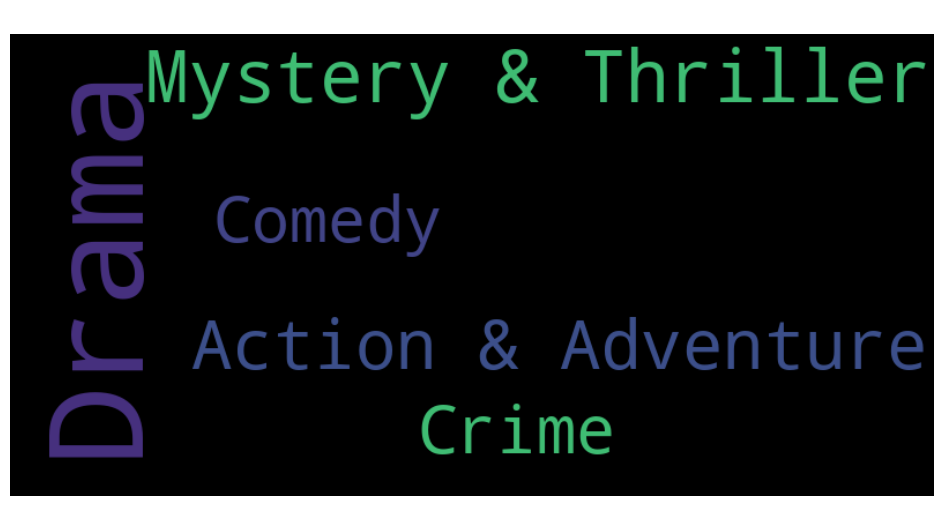

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for movies
wordcloud_movies = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_movies)

# Plot the word cloud for movies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Top Genres for Movies', fontsize=16, color='white')
plt.axis('off')
plt.show()

# Generate a word cloud for TV shows
wordcloud_tv_shows = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_tv_shows)

# Plot the word cloud for TV shows
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tv_shows, interpolation='bilinear')
plt.title('Top Genres for TV Shows', fontsize=16, color='white')
plt.axis('off')
plt.show()


## **Finding Predominant Streaming Service**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract streaming services for movies and TV shows
streaming_services_movies = movies_dataframe['movies_streaming_availability'].str.split(', ', expand=True).stack().value_counts()
streaming_services_tv_shows = tv_shows_dataframe['tv_shows_streaming_availability'].str.split(', ', expand=True).stack().value_counts()

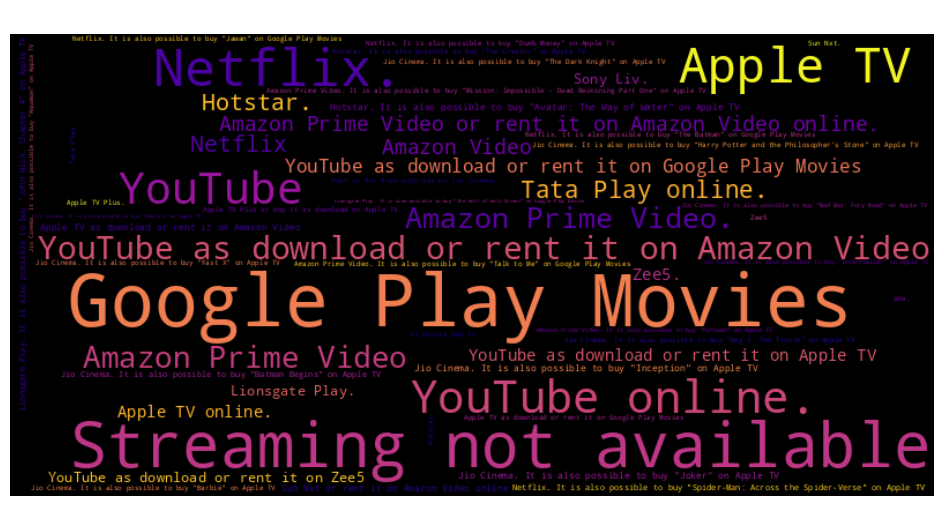

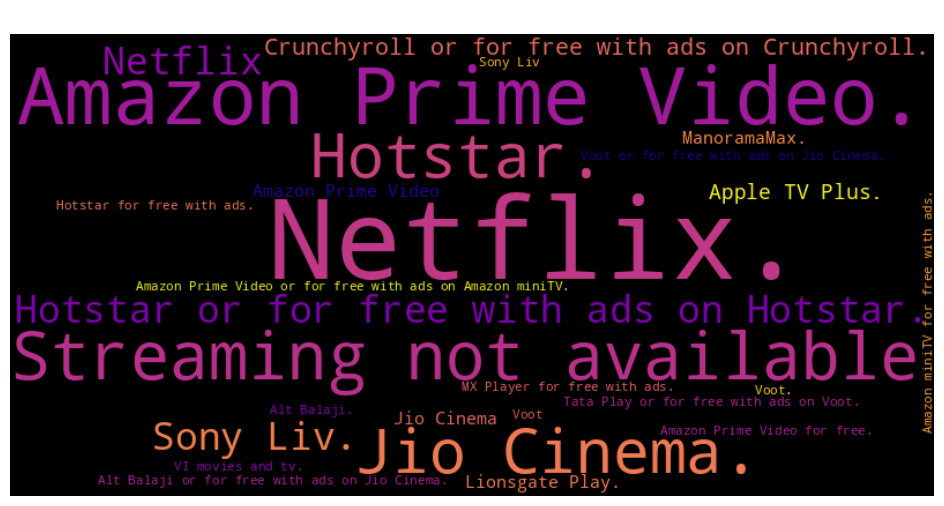

In [ ]:
#Let's Visvalize it using word cloud
# Generate a word cloud for streaming services in movies
wordcloud_movies_services = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    max_words=100,
    contour_width=3,
    contour_color='orange',
).generate_from_frequencies(streaming_services_movies)

# Plot the word cloud for streaming services in movies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_movies_services, interpolation='bilinear')
plt.title('Predominant Streaming Services for Movies', fontsize=16, color='white')
plt.axis('off')
plt.show()

# Generate a word cloud for streaming services in TV shows
wordcloud_tv_shows_services = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    max_words=100,
    contour_width=3,
    contour_color='orange',
).generate_from_frequencies(streaming_services_tv_shows)

# Plot the word cloud for streaming services in TV shows
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tv_shows_services, interpolation='bilinear')
plt.title('Predominant Streaming Services for TV Shows', fontsize=16, color='white')
plt.axis('off')
plt.show()


## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
# Save filtered movies dataframe to CSV
movies_dataframe.to_csv('movies_data.csv', index=False)

# Save filtered TV shows dataframe to CSV
tv_shows_dataframe.to_csv('tv_shows_data.csv', index=False)


In [ ]:
#saving filter data as Filter Data in csv format

# Save filtered movies dataframe to CSV
sorted_and_filterd_movies.to_csv('filtered_movies_data.csv', index=False)

# Save filtered TV shows dataframe to CSV
sorted_and_filterd_tv_shows.to_csv('filtered_tv_shows_data.csv', index=False)


# **Dataset Drive Link (View Access with Anyone) -**

https://drive.google.com/drive/folders/1Mrm7zjLmzNdy-DvEamzvkkGIWMbPqwVv?usp=drive_link

# ***Congratulations!!! You have completed your Assignment.***